In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn  as sb
import matplotlib.pyplot as plt



In [4]:
soc=pd.read_csv("/content/Social_Network_Ads.csv")

In [5]:
soc.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [16]:
soc.tail(3)

,User ID,Gender,Age,EstimatedSalary,Purchased,new_gen
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1
399,15594041,Female,49,36000,1,0


In [6]:
soc.shape

(400, 5)

In [7]:
soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
soc.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [9]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
soc['new_gen']=le.fit_transform(soc['Gender'])


In [20]:
x=soc.iloc[:,[2,3,5]].values

In [21]:
print(x)

[[   19 19000     1]
 [   35 20000     1]
 [   26 43000     0]
 ...
 [   50 20000     0]
 [   36 33000     1]
 [   49 36000     0]]


In [23]:
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


In [26]:
kmeans

KMeans(n_clusters=9, random_state=42)

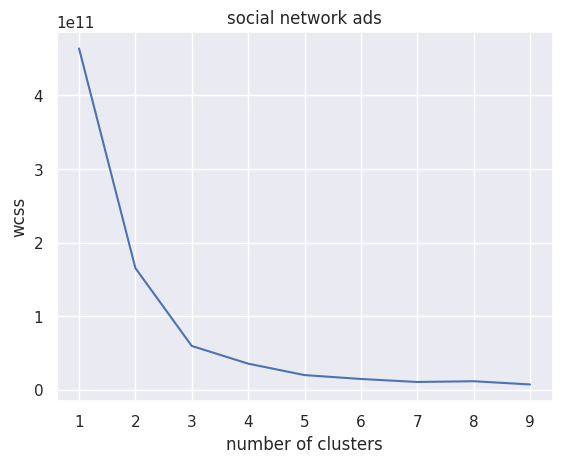

In [34]:
sb.set()
plt.plot(range(1,10),wcss)
plt.title("social network ads")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

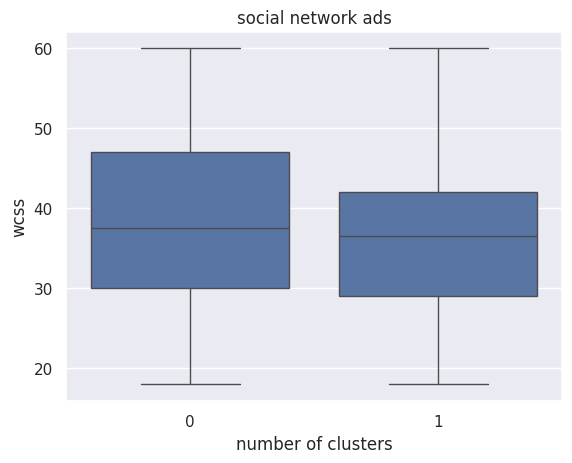

In [36]:
sb.boxplot(x='new_gen',y='Age',data=soc)
plt.title(" boxplot of social network ads")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()


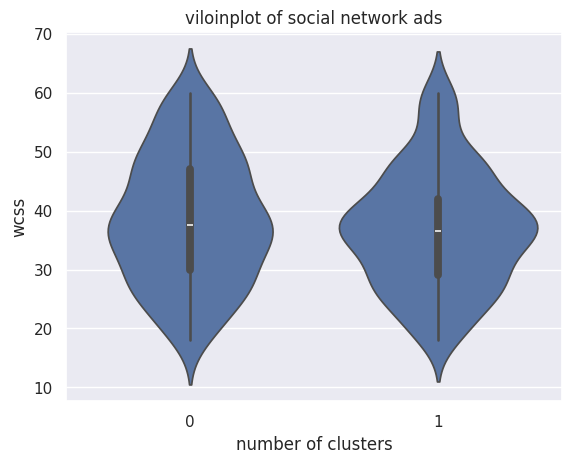

In [37]:
sb.violinplot(x='new_gen',y='Age',data=soc)
plt.title("viloinplot of social network ads")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

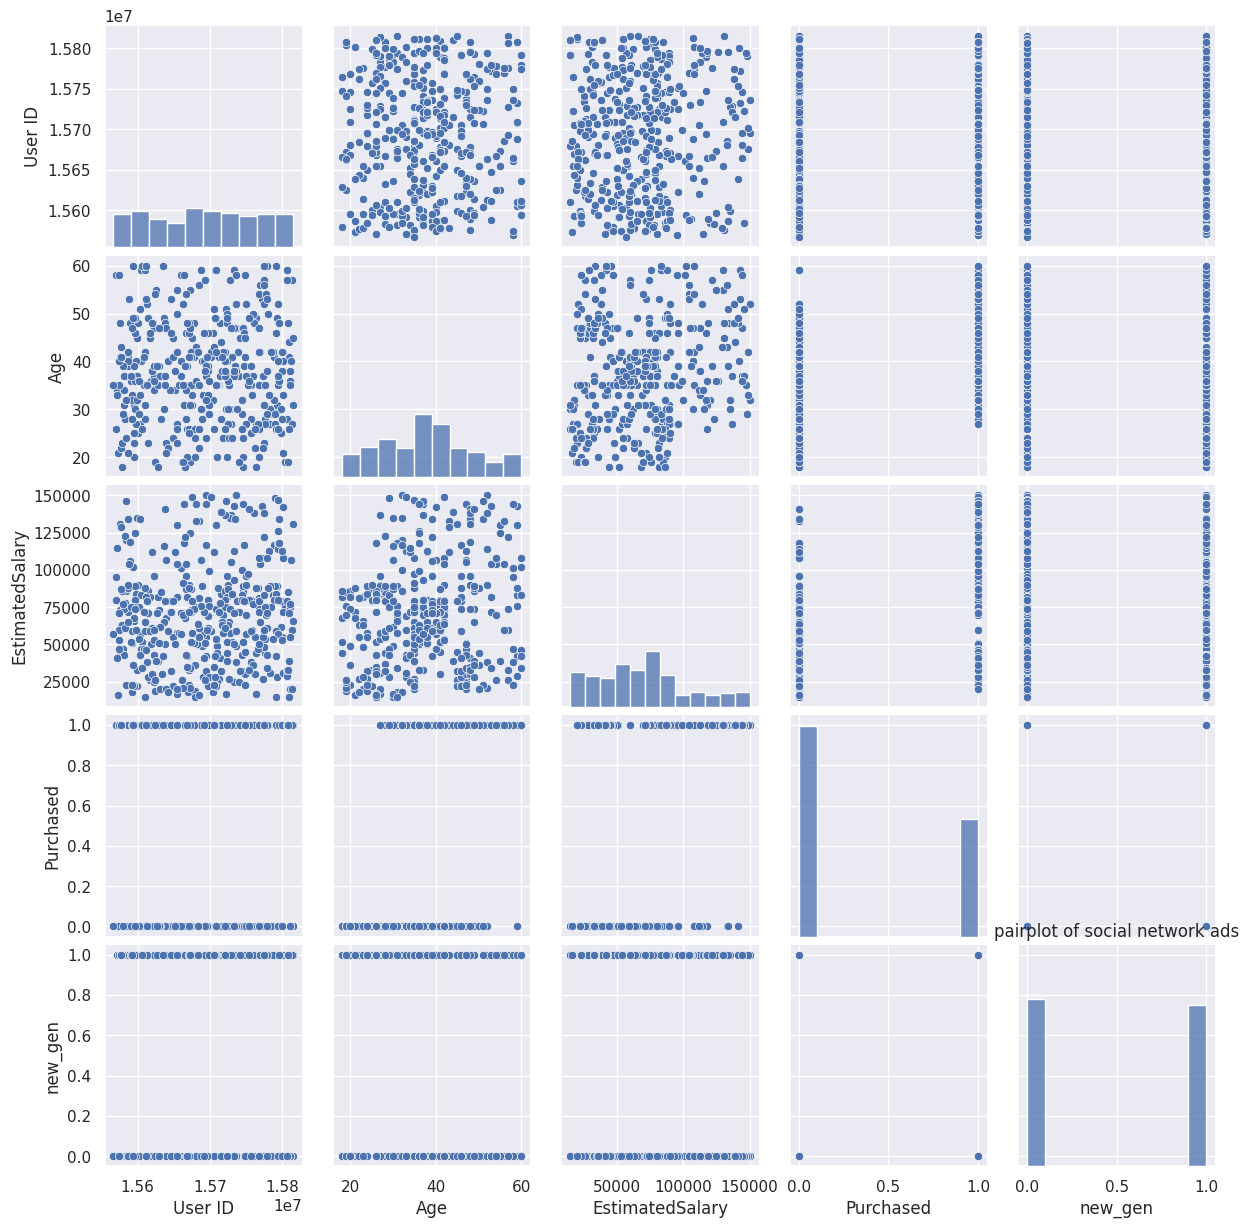

In [38]:
sb.pairplot(soc)
plt.title("pairplot of social network ads")
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()